In [137]:
import pandas as pd
 

In [138]:
import numpy as np

In [139]:
import matplotlib.pyplot as plt

In [140]:
import seaborn as sns

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [142]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [143]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [145]:
 # Load the Titanic dataset 

In [146]:
df1 = pd.read_csv("C:\\Users\\laksh\\OneDrive\\Desktop\\titanic\\gender_submission.csv")
 




In [147]:
df1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [148]:
df2=pd.read_csv("C:\\Users\\laksh\\OneDrive\\Desktop\\titanic\\test.csv")
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [149]:
df3=pd.read_csv("C:\\Users\\laksh\\OneDrive\\Desktop\\titanic\\train.csv")
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [150]:
# Concatenate the dataframes into a single dataframe
#using the concat() function.

In [151]:
# Concatenate dataframes
data = pd.concat([df1, df2, df3])

In [152]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,894,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,895,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,896,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.00,NaN,S
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.00,B42,S
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.45,NaN,S
889,890,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.00,C148,C


In [153]:
# Preprocess the data as necessary (fill missing values, encode categorical variables, etc.).


In [154]:
# Handle missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.dropna(subset=['Embarked'], inplace=True)



In [155]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,NaN,3.0,"Kelly, Mr. James",male,34.500000,0.0,0.0,330911,7.8292,NaN,Q
1,893,NaN,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1.0,0.0,363272,7.0000,NaN,S
2,894,NaN,2.0,"Myles, Mr. Thomas Francis",male,62.000000,0.0,0.0,240276,9.6875,NaN,Q
3,895,NaN,3.0,"Wirz, Mr. Albert",male,27.000000,0.0,0.0,315154,8.6625,NaN,S
4,896,NaN,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1.0,1.0,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,"Montvila, Rev. Juozas",male,27.000000,0.0,0.0,211536,13.0000,NaN,S
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0.0,112053,30.0000,B42,S
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.881138,1.0,2.0,W./C. 6607,23.4500,NaN,S
889,890,1.0,1.0,"Behr, Mr. Karl Howell",male,26.000000,0.0,0.0,111369,30.0000,C148,C


In [156]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])


In [157]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,NaN,3.0,"Kelly, Mr. James",34.500000,0.0,0.0,330911,7.8292,NaN,0,1,0,1,0
1,893,NaN,3.0,"Wilkes, Mrs. James (Ellen Needs)",47.000000,1.0,0.0,363272,7.0000,NaN,1,0,0,0,1
2,894,NaN,2.0,"Myles, Mr. Thomas Francis",62.000000,0.0,0.0,240276,9.6875,NaN,0,1,0,1,0
3,895,NaN,3.0,"Wirz, Mr. Albert",27.000000,0.0,0.0,315154,8.6625,NaN,0,1,0,0,1
4,896,NaN,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.000000,1.0,1.0,3101298,12.2875,NaN,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,"Montvila, Rev. Juozas",27.000000,0.0,0.0,211536,13.0000,NaN,0,1,0,0,1
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",19.000000,0.0,0.0,112053,30.0000,B42,1,0,0,0,1
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",29.881138,1.0,2.0,W./C. 6607,23.4500,NaN,1,0,0,0,1
889,890,1.0,1.0,"Behr, Mr. Karl Howell",26.000000,0.0,0.0,111369,30.0000,C148,0,1,1,0,0


In [158]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,NaN,3.0,"Kelly, Mr. James",34.5,0.0,0.0,330911,7.8292,NaN,0,1,0,1,0
1,893,NaN,3.0,"Wilkes, Mrs. James (Ellen Needs)",47.0,1.0,0.0,363272,7.0000,NaN,1,0,0,0,1
2,894,NaN,2.0,"Myles, Mr. Thomas Francis",62.0,0.0,0.0,240276,9.6875,NaN,0,1,0,1,0
3,895,NaN,3.0,"Wirz, Mr. Albert",27.0,0.0,0.0,315154,8.6625,NaN,0,1,0,0,1
4,896,NaN,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1.0,1.0,3101298,12.2875,NaN,1,0,0,0,1


In [159]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,1307.000000,889.000000,1307.000000,1307.000000,1307.000000,1307.000000,1306.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,655.319816,0.382452,2.296863,29.850351,0.499617,0.385616,33.223956,0.355011,0.644989,0.206580,0.094109,0.699311
std,377.922205,0.486260,0.836942,12.860385,1.042273,0.866092,51.765986,0.478700,0.478700,0.405006,0.292092,0.458733
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,29.881138,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,982.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,NaN,3.0,"Kelly, Mr. James",34.500000,0.0,0.0,330911,7.8292,NaN,0,1,0,1,0
1,893,NaN,3.0,"Wilkes, Mrs. James (Ellen Needs)",47.000000,1.0,0.0,363272,7.0000,NaN,1,0,0,0,1
2,894,NaN,2.0,"Myles, Mr. Thomas Francis",62.000000,0.0,0.0,240276,9.6875,NaN,0,1,0,1,0
3,895,NaN,3.0,"Wirz, Mr. Albert",27.000000,0.0,0.0,315154,8.6625,NaN,0,1,0,0,1
4,896,NaN,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.000000,1.0,1.0,3101298,12.2875,NaN,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,"Montvila, Rev. Juozas",27.000000,0.0,0.0,211536,13.0000,NaN,0,1,0,0,1
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",19.000000,0.0,0.0,112053,30.0000,B42,1,0,0,0,1
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",29.881138,1.0,2.0,W./C. 6607,23.4500,NaN,1,0,0,0,1
889,890,1.0,1.0,"Behr, Mr. Karl Howell",26.000000,0.0,0.0,111369,30.0000,C148,0,1,1,0,0


In [161]:
# Feature scaling (normalize Age and Fare columns)
data['Age'] = (data['Age'] - data['Age'].min()) / (data['Age'].max() - data['Age'].min())
data['Fare'] = (data['Fare'] - data['Fare'].min()) / (data['Fare'].max() - data['Fare'].min())


In [162]:
data['Age']

0      0.430039
1      0.586622
2      0.774521
3      0.336089
4      0.273456
         ...   
886    0.336089
887    0.235876
888    0.372180
889    0.323563
890    0.398722
Name: Age, Length: 1307, dtype: float64

In [163]:
cm = sns.light_palette("Darkblue",as_cmap=True)
data.head(5).style.background_gradient(cmap=cm)

C:\Users\laksh\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\laksh\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,nan,3.000000,"Kelly, Mr. James",0.430039,0.000000,0.000000,330911,0.015282,nan,0,1,0,1,0
1,893,nan,3.000000,"Wilkes, Mrs. James (Ellen Needs)",0.586622,1.000000,0.000000,363272,0.013663,nan,1,0,0,0,1
2,894,nan,2.000000,"Myles, Mr. Thomas Francis",0.774521,0.000000,0.000000,240276,0.018909,nan,0,1,0,1,0
3,895,nan,3.000000,"Wirz, Mr. Albert",0.336089,0.000000,0.000000,315154,0.016908,nan,0,1,0,0,1
4,896,nan,3.000000,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.273456,1.000000,1.000000,3101298,0.023984,nan,1,0,0,0,1


In [164]:
data['Fare']

0      0.015282
1      0.013663
2      0.018909
3      0.016908
4      0.023984
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare, Length: 1307, dtype: float64

In [165]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,NaN,3.0,"Kelly, Mr. James",0.430039,0.0,0.0,330911,0.015282,NaN,0,1,0,1,0
1,893,NaN,3.0,"Wilkes, Mrs. James (Ellen Needs)",0.586622,1.0,0.0,363272,0.013663,NaN,1,0,0,0,1
2,894,NaN,2.0,"Myles, Mr. Thomas Francis",0.774521,0.0,0.0,240276,0.018909,NaN,0,1,0,1,0
3,895,NaN,3.0,"Wirz, Mr. Albert",0.336089,0.0,0.0,315154,0.016908,NaN,0,1,0,0,1
4,896,NaN,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.273456,1.0,1.0,3101298,0.023984,NaN,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,"Montvila, Rev. Juozas",0.336089,0.0,0.0,211536,0.025374,NaN,0,1,0,0,1
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",0.235876,0.0,0.0,112053,0.058556,B42,1,0,0,0,1
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",0.372180,1.0,2.0,W./C. 6607,0.045771,NaN,1,0,0,0,1
889,890,1.0,1.0,"Behr, Mr. Karl Howell",0.323563,0.0,0.0,111369,0.058556,C148,0,1,1,0,0


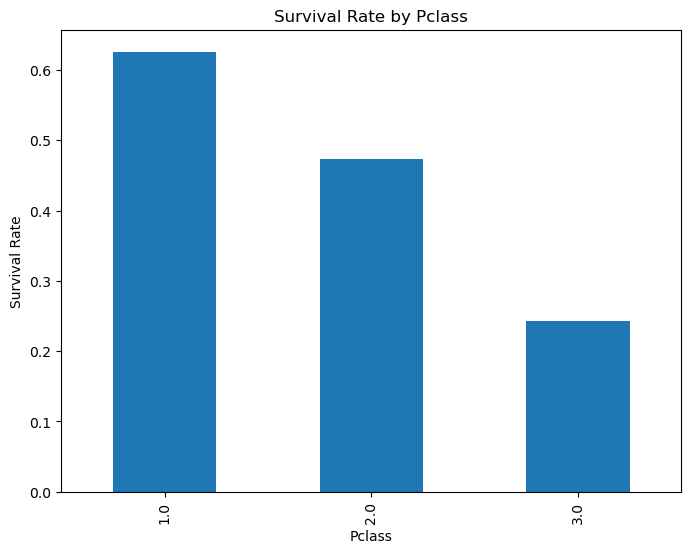

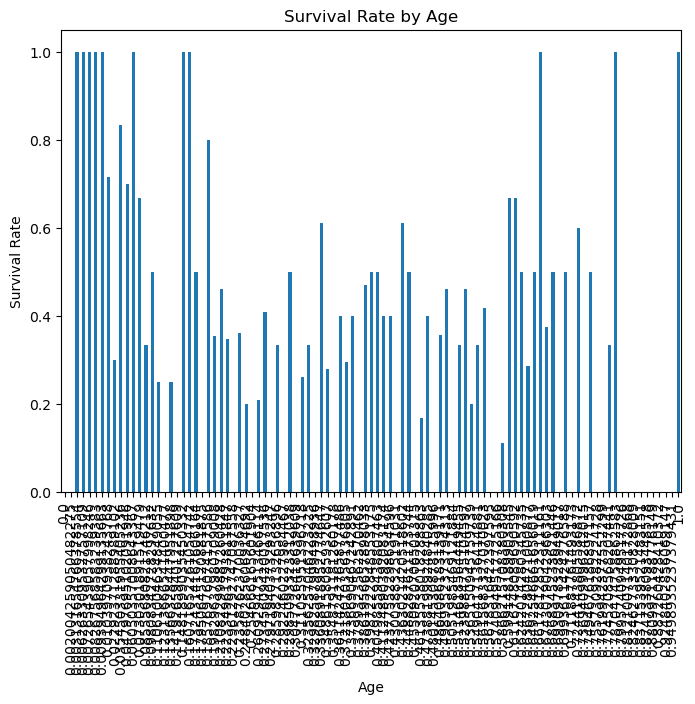

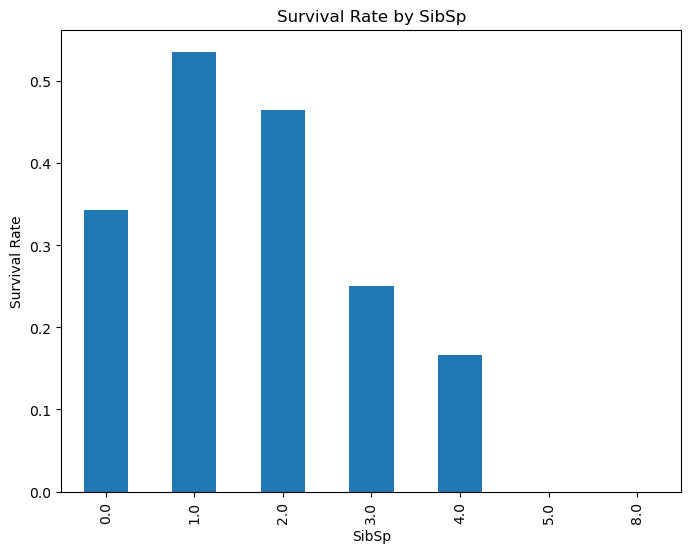

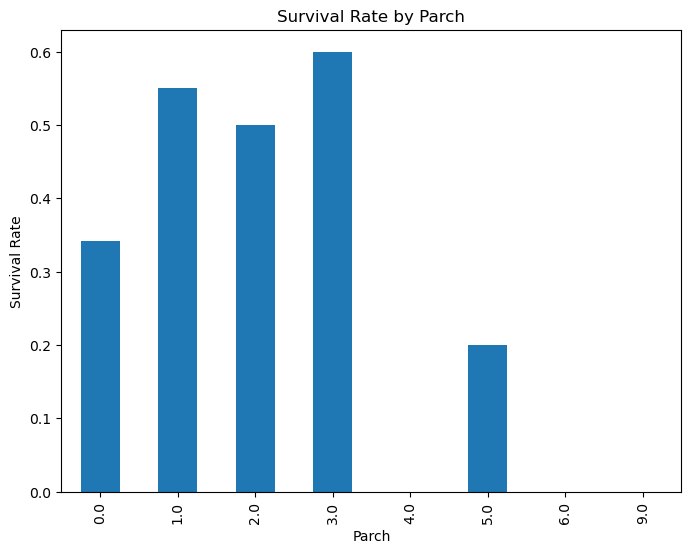

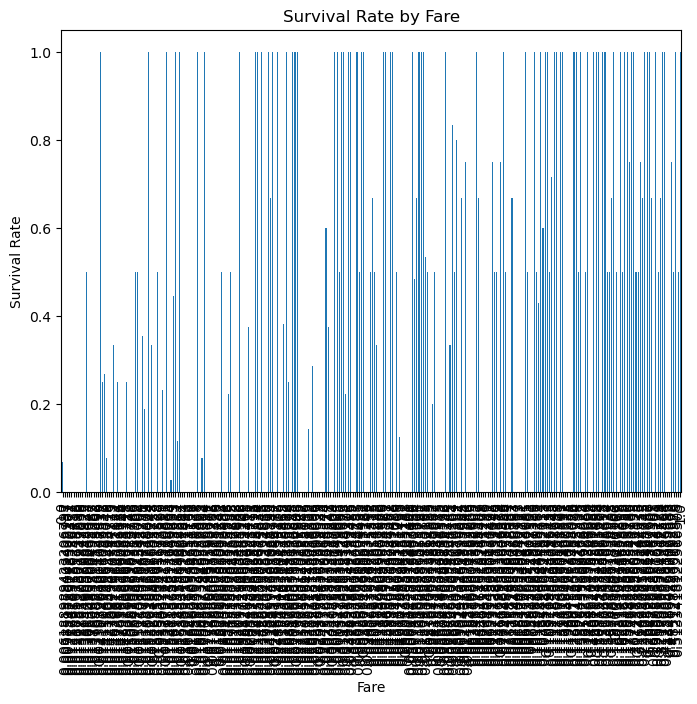

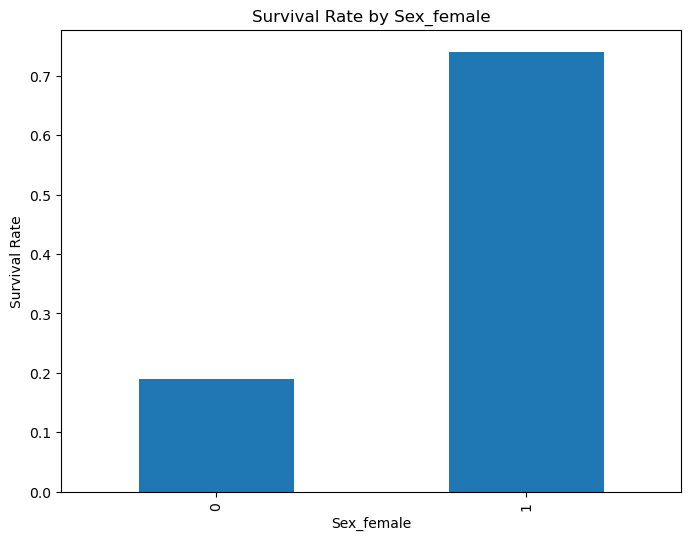

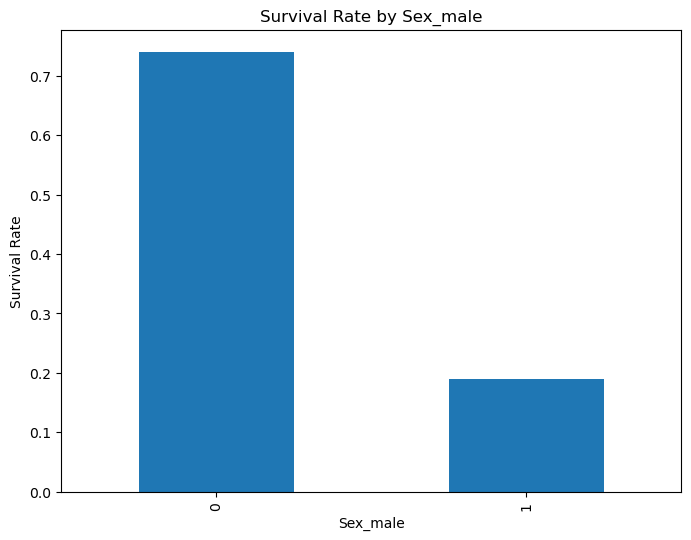

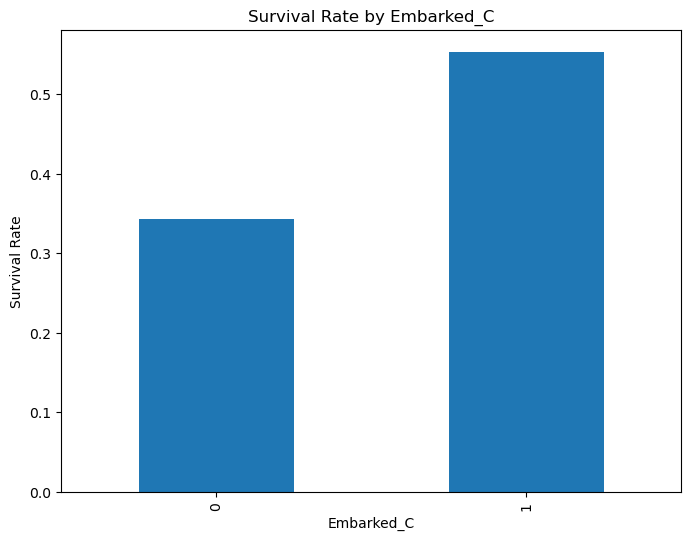

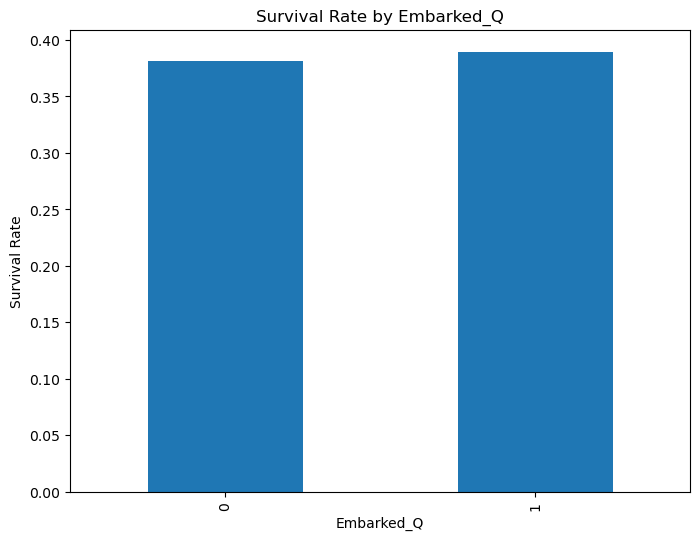

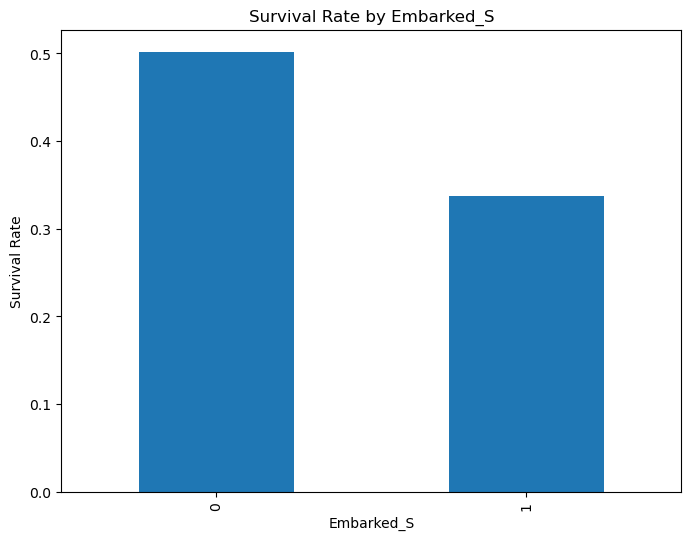

In [166]:
# Create a bar chart for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    data.groupby(feature)[target].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Survival Rate')
    plt.title(f'Survival Rate by {feature}')
    plt.show()

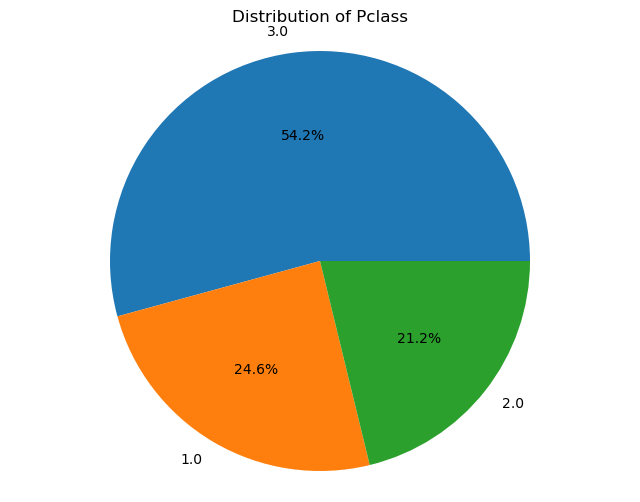

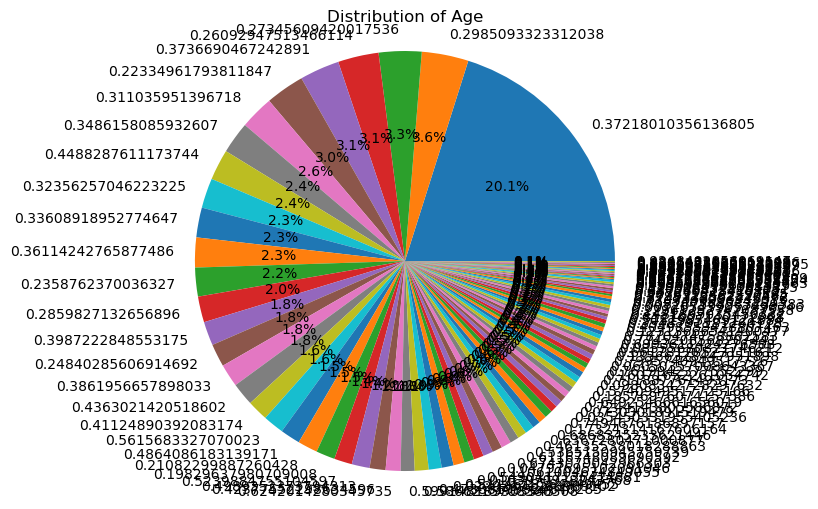

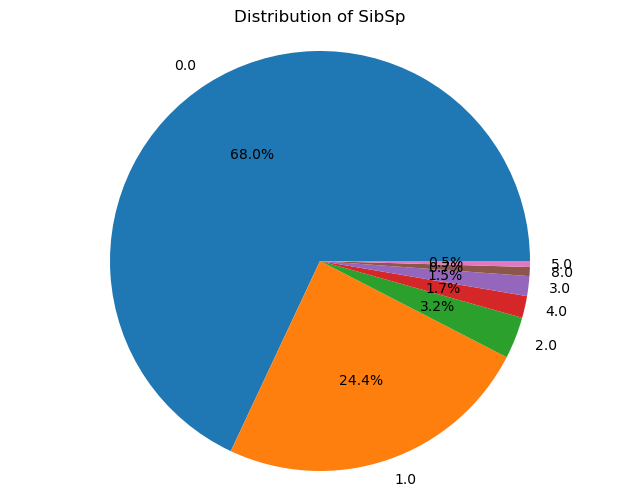

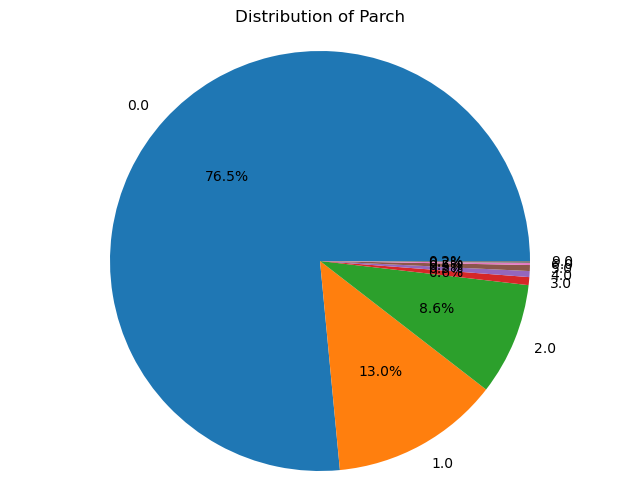

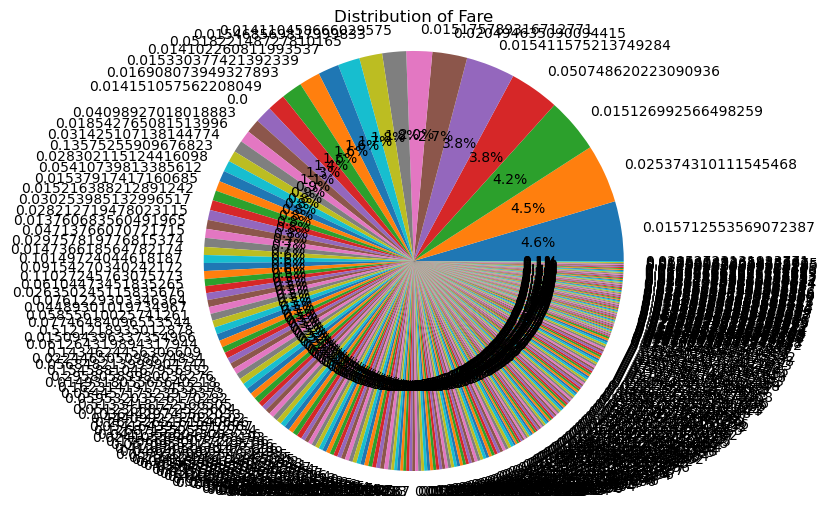

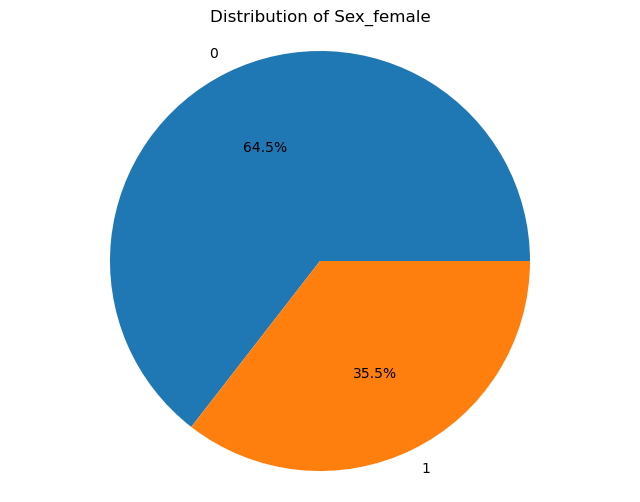

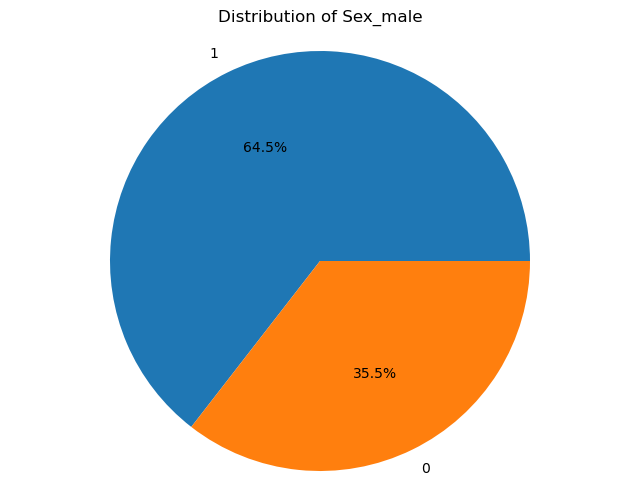

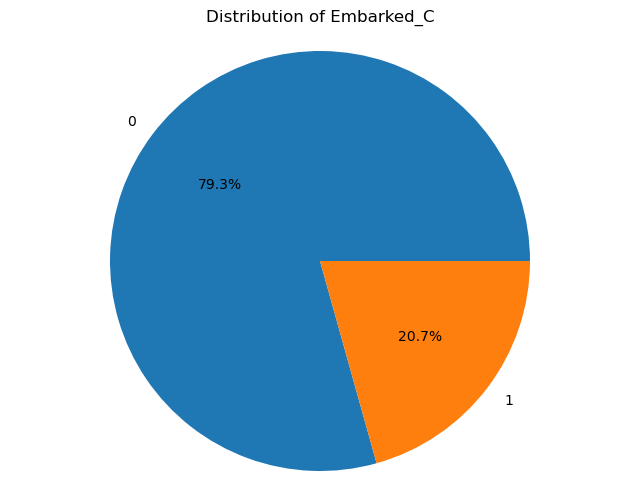

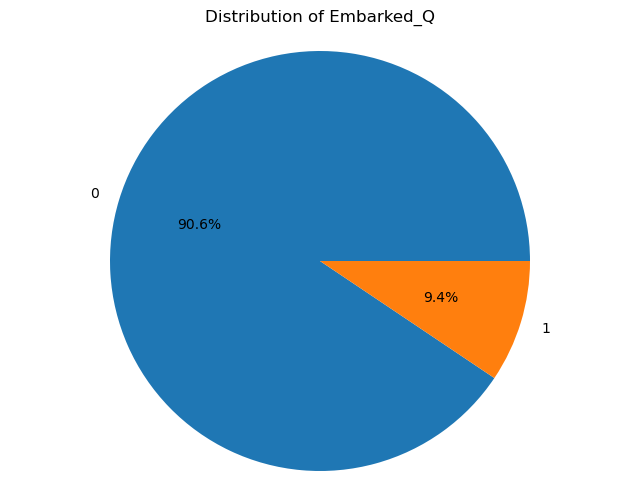

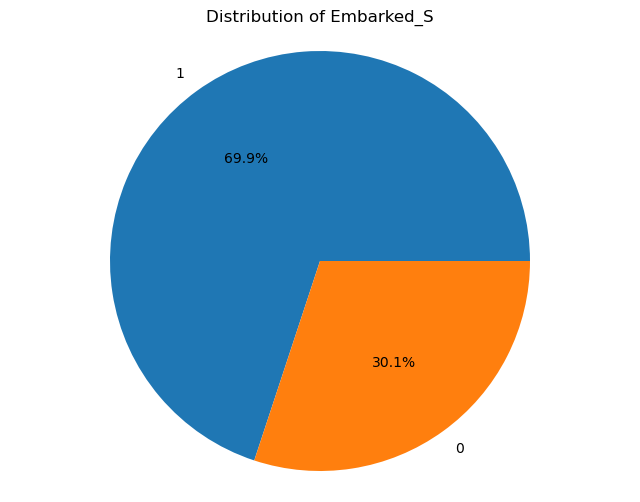

In [167]:
# Create a pie chart for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    data[feature].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(f'Distribution of {feature}')
    plt.ylabel('')
    plt.show()

In [168]:
 #Feature Scaling
scaler = MinMaxScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [169]:
scaler

MinMaxScaler()

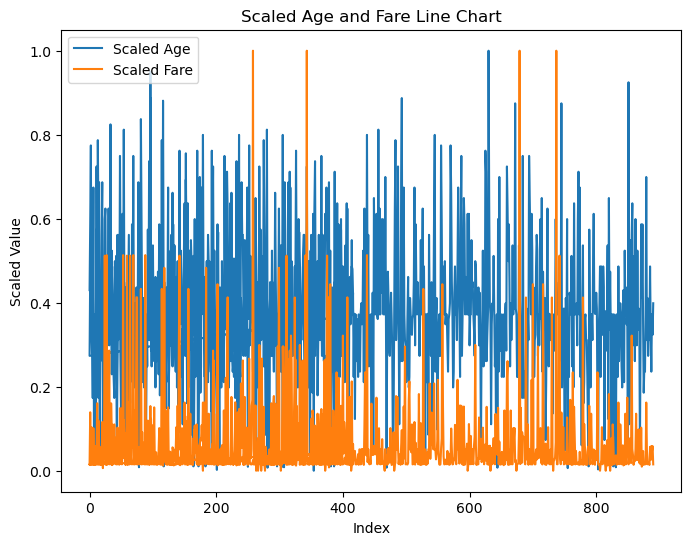

In [170]:
# Create a line chart for the scaled features
plt.figure(figsize=(8, 6))
plt.plot(data['Age'], label='Scaled Age')
plt.plot(data['Fare'], label='Scaled Fare')
plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.title('Scaled Age and Fare Line Chart')
plt.legend()
plt.show()

In [171]:
 # Select features and target variable
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

In [172]:
# Drop rows with missing values in the 'Survived' target variable
data = data.dropna(subset=[target])


In [173]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3.0,"Braund, Mr. Owen Harris",0.273456,1.0,0.0,A/5 21171,0.014151,NaN,0,1,0,0,1
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.473882,1.0,0.0,PC 17599,0.139136,C85,1,0,1,0,0
2,3,1.0,3.0,"Heikkinen, Miss. Laina",0.323563,0.0,0.0,STON/O2. 3101282,0.015469,NaN,1,0,0,0,1
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.436302,1.0,0.0,113803,0.103644,C123,1,0,0,0,1
4,5,0.0,3.0,"Allen, Mr. William Henry",0.436302,0.0,0.0,373450,0.015713,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,"Montvila, Rev. Juozas",0.336089,0.0,0.0,211536,0.025374,NaN,0,1,0,0,1
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",0.235876,0.0,0.0,112053,0.058556,B42,1,0,0,0,1
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",0.372180,1.0,2.0,W./C. 6607,0.045771,NaN,1,0,0,0,1
889,890,1.0,1.0,"Behr, Mr. Karl Howell",0.323563,0.0,0.0,111369,0.058556,C148,0,1,1,0,0


In [174]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)


In [175]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
708,1.0,0.273456,0.0,0.0,0.295806,1,0,0,0,1
240,3.0,0.372180,1.0,0.0,0.028213,1,0,1,0,0
382,3.0,0.398722,0.0,0.0,0.015469,0,1,0,0,1
792,3.0,0.372180,8.0,2.0,0.135753,1,0,0,0,1
683,3.0,0.173243,5.0,2.0,0.091543,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
107,3.0,0.372180,0.0,0.0,0.015176,0,1,0,0,1
271,3.0,0.311036,0.0,0.0,0.000000,0,1,0,0,1
862,1.0,0.599148,0.0,0.0,0.050610,1,0,0,0,1
436,3.0,0.260929,2.0,2.0,0.067096,1,0,0,0,1


In [176]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
281,3.0,0.348616,0.0,0.0,0.015330,0,1,0,0,1
435,1.0,0.173243,1.0,2.0,0.234224,1,0,0,0,1
39,3.0,0.173243,1.0,0.0,0.021942,1,0,1,0,0
418,2.0,0.373669,0.0,0.0,0.025374,0,1,0,0,1
585,1.0,0.223350,0.0,2.0,0.155466,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
433,3.0,0.210823,0.0,0.0,0.013907,0,1,0,0,1
807,3.0,0.223350,0.0,0.0,0.015176,1,0,0,0,1
25,3.0,0.473882,1.0,5.0,0.061264,1,0,0,0,1
85,3.0,0.411249,3.0,0.0,0.030937,1,0,0,0,1


In [177]:
y_train

708    1.0
240    0.0
382    0.0
792    0.0
683    0.0
      ... 
107    1.0
271    1.0
862    1.0
436    0.0
103    0.0
Name: Survived, Length: 711, dtype: float64

In [178]:
y_test

281    0.0
435    1.0
39     1.0
418    0.0
585    1.0
      ... 
433    0.0
807    0.0
25     1.0
85     1.0
10     1.0
Name: Survived, Length: 178, dtype: float64

In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score

In [180]:
model = Sequential()
model.add(Dense(64, input_dim=len(features), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [181]:
model

In [182]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [183]:
model

In [184]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
23/23 [==============================] - 1s 3ms/step - loss: 0.6161 - accuracy: 0.6653
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.5450 - accuracy: 0.7412
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.5012 - accuracy: 0.7834
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4724 - accuracy: 0.7947
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4607 - accuracy: 0.7975
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.8031
Epoch 7/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4439 - accuracy: 0.8045
Epoch 8/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4396 - accuracy: 0.8129
Epoch 9/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4359 - accuracy: 0.8045
Epoch 10/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4319 - accuracy: 0.8087


In [185]:
print(y_train.isnull().sum())

0


In [186]:
from sklearn.impute import SimpleImputer


In [187]:
# Create an imputer object with median strategy
imputer = SimpleImputer(strategy='median')

In [188]:
# Fit the imputer on the training data
imputer.fit(X_train)


SimpleImputer(strategy='median')

In [189]:

# Impute missing values in both training and testing sets
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [190]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert to binary predictions



6/6 [==============================] - 0s 3ms/step


In [191]:
# Check for missing values in the 'Survived' column
if data['Survived'].isnull().any():
    # If there are missing values, you can choose to remove the rows
    data = data.dropna(subset=['Survived'])


In [192]:
# Evaluate the model
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8033707865168539


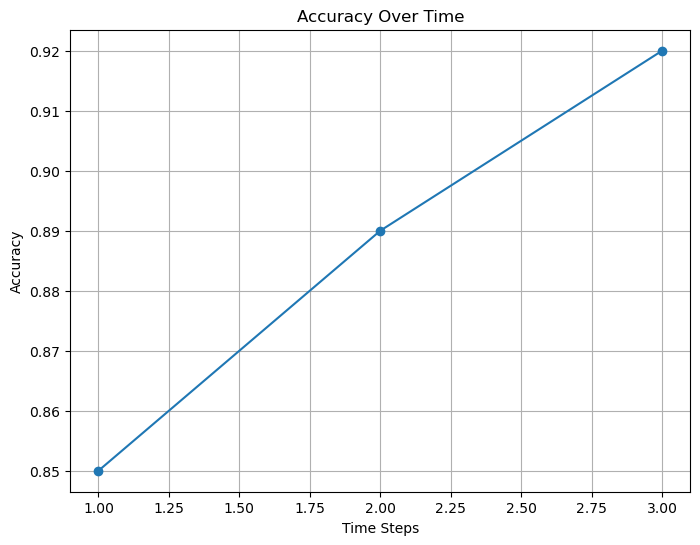

In [193]:
# Create a line chart to display accuracy over time or parameter changes
# Define time_steps and corresponding accuracy values
time_steps = [1, 2, 3]  # Modify with your time steps
accuracy_values = [0.85, 0.89, 0.92]  # Modify with your accuracy values

plt.figure(figsize=(8, 6))
plt.plot(time_steps, accuracy_values, marker='o', linestyle='-')
plt.xlabel("Time Steps")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Time")
plt.grid(True)
plt.show()

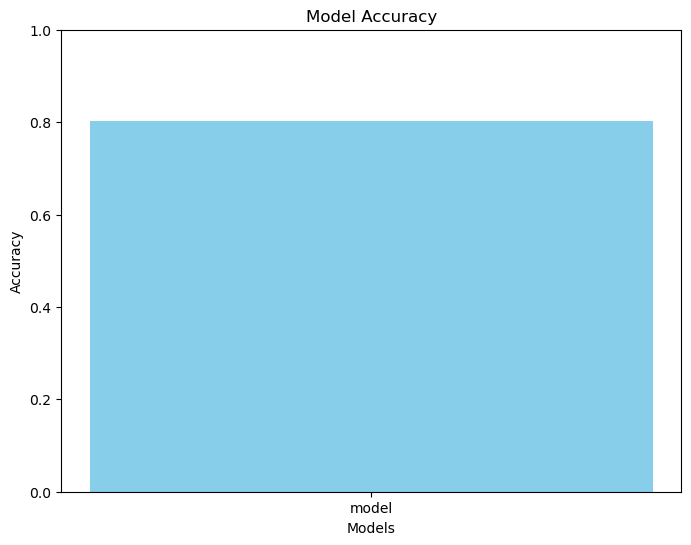

In [194]:
# Create a bar chart to display accuracy
model_names = ["model"]
accuracy_scores = [accuracy]  # Use your actual accuracy scores here

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.ylim(0, 1)  # Set the y-axis limit (0 to 1)
plt.show()